In [107]:
import numpy as np
import keras 
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [108]:
(X_train, Y_train), (X_pred, Y_pred) = mnist.load_data()

In [109]:
len(X_train)

60000

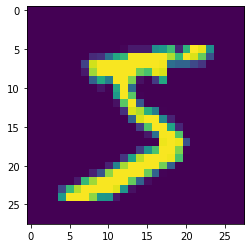

In [110]:
plt.imshow(X_train[0])

In [111]:
Y_train[0]

5

In [112]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train,
                                                    test_size=0.3, random_state=95)

In [113]:
dim = 28*28
X_train = X_train.reshape(len(X_train), dim)
x_test = x_test.reshape(len(x_test), dim)

In [114]:
#Используйте метод главных компонент для набора данных MNIST (train dataset объема 60000). 
#Определите, какое минимальное количество главных компонент  необходимо использовать, 
#чтобы доля объясненной дисперсии превышала 0.84 (была строго больше указанного значения).

from sklearn.decomposition import PCA

n_components = 56


pca = PCA(n_components=n_components, svd_solver='full')
modelPCA = pca.fit(X_train)
X_train = modelPCA.transform(X_train)

[0.097  0.168  0.2297 0.2836 0.3323 0.3754 0.4081 0.437  0.4646 0.4881
 0.5092 0.5295 0.5466 0.5636 0.5793 0.5942 0.6074 0.6202 0.6321 0.6436
 0.6542 0.6643 0.6738 0.683  0.6918 0.7002 0.7083 0.7162 0.7236 0.7305
 0.7371 0.7436 0.7496 0.7555 0.7612 0.7666 0.7717 0.7766 0.7814 0.7861
 0.7907 0.7951 0.7993 0.8033 0.8071 0.8109 0.8145 0.818  0.8214 0.8246
 0.8278 0.831  0.8339 0.8368 0.8397 0.8424]


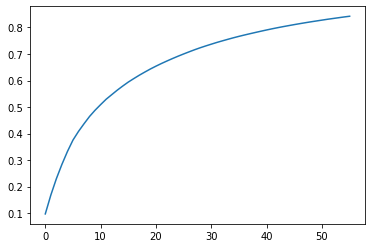

In [115]:
#Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),4)
print(explained_variance)
plt.plot(np.arange(len(explained_variance)), explained_variance, ls = '-')

In [116]:
from statistics import mean
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=95)


In [169]:
X_train

array([[ 123.93258866, -312.67426202,  -24.51405176, ...,   87.60119904,
           3.10258115, -164.08696674],
       [1011.71837587, -294.85703827,  596.33956104, ...,  -18.62196333,
          80.58986121,  -60.44271239],
       [ -51.84960805,  392.17315286, -188.50974943, ...,  154.3020004 ,
        -195.5359139 , -181.6729221 ],
       ...,
       [-178.0534496 ,  160.07821109, -257.61308227, ...,  -51.15541281,
         -25.16410434,    5.40559171],
       [ 130.60607208,   -5.59193642,  513.85867395, ..., -249.3255139 ,
         175.48957045,  -90.05790799],
       [-173.43595244,  -24.71880226,  556.01889393, ...,   83.60939572,
         -39.50295294,  274.83391159]])

In [171]:
summ = 0
count = 0
for i in x_train:
    summ+= i[0]
    count+=1
print(summ/count)

2.971617310280483


In [118]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [119]:
#Используя метод многоклассовой классификации One-vs-All OneVsRestClassifier(), 
#обучите алгоритм случайного леса RandomForestClassifier() с параметрами criterion='gini', 
#min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=95. 
#Выполните оценку с помощью тестовых данных.


tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=95)
onvrc1 = OneVsRestClassifier(tree).fit(x_train, y_train)

logistic = LogisticRegression(solver='lbfgs', random_state=95)
onvrc2 = OneVsRestClassifier(logistic).fit(x_train, y_train)

dec = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, random_state=95)
onvrc3 = OneVsRestClassifier(dec).fit(x_train, y_train)


c:\users\kosmonavt\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\kosmonavt\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

In [131]:
#Введите количество верно классифицированных объектов класса 4 для тестовых данных:

#x_test1 = modelPCA.transform(x_test)
y_pred = onvrc1.predict(x_test)



In [132]:
y_pred

array([2, 2, 5, ..., 5, 7, 9], dtype=uint8)

In [133]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix( y_pred,y_test)

In [134]:
CM

array([[1643,    2,   11,    5,    8,   22,   25,    9,   21,   14],
       [   0, 1989,   12,    5,   11,    3,    1,   19,   11,   12],
       [   8,   13, 1661,   55,   16,   11,   11,   22,   23,   10],
       [   3,    6,   23, 1600,    0,   68,    2,    7,   60,   26],
       [   3,    3,   10,    4, 1603,   14,    4,   35,   10,   73],
       [   7,    7,    7,   59,    9, 1409,   28,    7,   59,   11],
       [  20,    5,   11,    4,   24,   26, 1720,    1,    9,    3],
       [   6,    7,   28,   13,    8,    4,    0, 1794,    7,   34],
       [   8,    6,   38,   33,   16,   29,   11,   12, 1480,   14],
       [   3,    4,    8,   18,   71,   14,    0,   49,   25, 1627]],
      dtype=int64)

In [135]:
#Введите количество верно классифицированных объектов класса 4 для тестовых данных:
CM[4][4]

1603

In [159]:
import pandas as pd

df = pd.read_csv('pred_for_task.csv') 

In [160]:
file = df[df['FileName']== 'file23']

In [161]:
var = file[file.columns[2:]].values.tolist()

x1 = np.asarray(var)

dim = 28*28
x = x1.reshape(len(x1), dim)
x = modelPCA.transform(x1)

In [164]:
onvrc3.predict_proba(x)

array([[4.53806299e-05, 0.00000000e+00, 0.00000000e+00, 2.61194377e-04,
        0.00000000e+00, 1.09856420e-02, 9.88707783e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [149]:
onvrc2.predict(x)

array([7], dtype=uint8)